In [ ]:
<br> Radley Ciego </br>
<br> GTECH 78518: Environmental Data Science </br>
<br> November 15, 2022 </br>
<br> Homework #8 </br>

In [1]:
# import libraries
from glob import glob
import os
import urllib

import rasterio as rio
from rasterio.plot import show
import xarray as xr
import rioxarray as rxr

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir('/Users/radleyciego/GitHub/environmental-data-science/data/LC08_L1TP_004069_20210703_20210713_01_T1')
os.getcwd

<function posix.getcwd()>

In [4]:
fn = 'LC08_L1TP_004069_20210703_20210713_01_T1_B1.tif'
nyc = rio.open(fn)

In [5]:
type(nyc)

rasterio.io.DatasetReader

In [7]:
nyc.crs

CRS.from_epsg(32618)

In [8]:
# column, row, and bands
print(nyc.width)
print(nyc.height)
print(nyc.count)

7691
7811
1


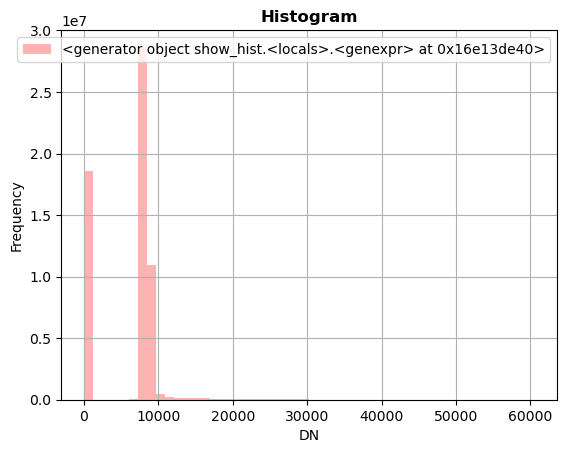

In [11]:
from rasterio.plot import show_hist

show_hist(nyc, bins=50, lw=0.0, stacked=False, alpha=0.3,
      histtype='stepfilled', title='Histogram')